# Exploratory Data Analysis

In [1]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')

# Limiting float output to 2 decimal points 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
from subprocess import check_output

# Check all avaliable files
print(check_output(["ls", "./"]).decode("utf8")) 

D3 Tree Map
EDA-Insights.ipynb
XGboost Model.ipynb
aisles.csv
da_count.csv
da_order.csv
depart_aisle_count.csv
depart_aisle_order.csv
departments.csv
order_products__prior.csv
order_products__test_cap.csv
order_products__train_cap.csv
orders.csv
products.csv
summary.csv



### Import data and take a look:

In [4]:
order_products_train = pd.read_csv('./order_products__train_cap.csv')
order_products_test = pd.read_csv('./order_products__test_cap.csv')
order_products_prior = pd.read_csv('./order_products__prior.csv')
orders = pd.read_csv('./orders.csv')
products = pd.read_csv('./products.csv')
aisles = pd.read_csv('./aisles.csv')
departments = pd.read_csv('./departments.csv')

In [5]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [6]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [7]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,36,39612,1,0
1,36,19660,2,1
2,36,49235,3,0
3,36,43086,4,1
4,36,46620,5,1


In [8]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,nan
1,2398795,1,prior,2,3,7,15.00
2,473747,1,prior,3,3,12,21.00
3,2254736,1,prior,4,4,7,29.00
4,431534,1,prior,5,4,15,28.00


In [9]:
orders.shape

(3421083, 7)

In [10]:
print("The order_products_train size is : ", order_products_train.shape)
print("The order_products_test size is : ", order_products_test.shape)
print("The order_products_prior size is : ", order_products_prior.shape)
order_products_all = pd.concat([order_products_train, order_products_prior], axis=0)
print("The order_products_all size is : ", order_products_all.shape)

The order_products_train size is :  (1038515, 4)
The order_products_test size is :  (346102, 2)
The order_products_prior size is :  (32434489, 4)
The order_products_all size is :  (33473004, 4)


### Check missing data and data cleaning: 

In [11]:
total = order_products_all.isnull().sum().sort_values(ascending=False)
percent = (order_products_all.isnull().sum()/order_products_all.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent'])
missing_data

,Total Missing,Percent
reordered,0,0.00
add_to_cart_order,0,0.00
product_id,0,0.00
order_id,0,0.00


In [15]:
order_products_all.dtypes

order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object

There is no missing data in order_products_all dataset, thus no need of further cleaning.

### Check the number of unique orders and unique products

In [16]:
# Check the number of unique orders and unique products
orders_Unique = len(set(order_products_all.order_id))
products_Unique = len(set(order_products_all.product_id))
print("There are %s orders for %s products" %(orders_Unique, products_Unique))

There are 3313280 orders for 49681 products


In [4]:
# Check the number of unique users
users_Unique =  len(set(orders.user_id))
print("There are %s unique uesers"%users_Unique)

There are 206209 unique uesers


In [17]:
# Check how many products are there in the store:
print("Total number of products on record:", products.shape[0])

Total number of products on record: 49688


### Items that are never sold:

In [18]:
never_sold = products[~products.product_id.isin(set(order_products_all.product_id))]

In [19]:
never_sold

,product_id,product_name,aisle_id,department_id
3629,3630,Protein Granola Apple Crisp,57,14
3717,3718,Wasabi Cheddar Spreadable Cheese,21,16
7044,7045,Unpeeled Apricot Halves in Heavy Syrup,88,13
37702,37703,Ultra Sun Blossom Liquid 90 loads Fabric Enhan...,75,17
43724,43725,Sweetart Jelly Beans,100,21
45970,45971,12 Inch Taper Candle White,101,17
46624,46625,Single Barrel Kentucky Straight Bourbon Whiskey,31,7


### Most frequently buy items:

In [20]:
order_products_all_df = pd.merge(order_products_all, products, on='product_id', how='left')
order_products_all_df = pd.merge(order_products_all_df, aisles, on='aisle_id', how='left')
order_products_all_df = pd.merge(order_products_all_df, departments, on='department_id', how='left')
#order_products_all_df.head()

In [21]:
cnt_srs = order_products_all_df['product_name'].value_counts().reset_index().head(20)
cnt_srs.columns = ['product_name', 'frequency_count']
cnt_srs

,product_name,frequency_count
0,Banana,486557
1,Bag of Organic Bananas,391028
2,Organic Strawberries,272907
3,Organic Baby Spinach,249299
4,Organic Hass Avocado,219055
5,Organic Avocado,182350
6,Large Lemon,158692
7,Strawberries,147810
8,Limes,145162
9,Organic Whole Milk,141566


## Understanding the order:

### Distribution of number of products per order

In [22]:
# Does not count the number of items in the order of the test data
grouped = order_products_all.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
grouped = grouped.add_to_cart_order.value_counts()

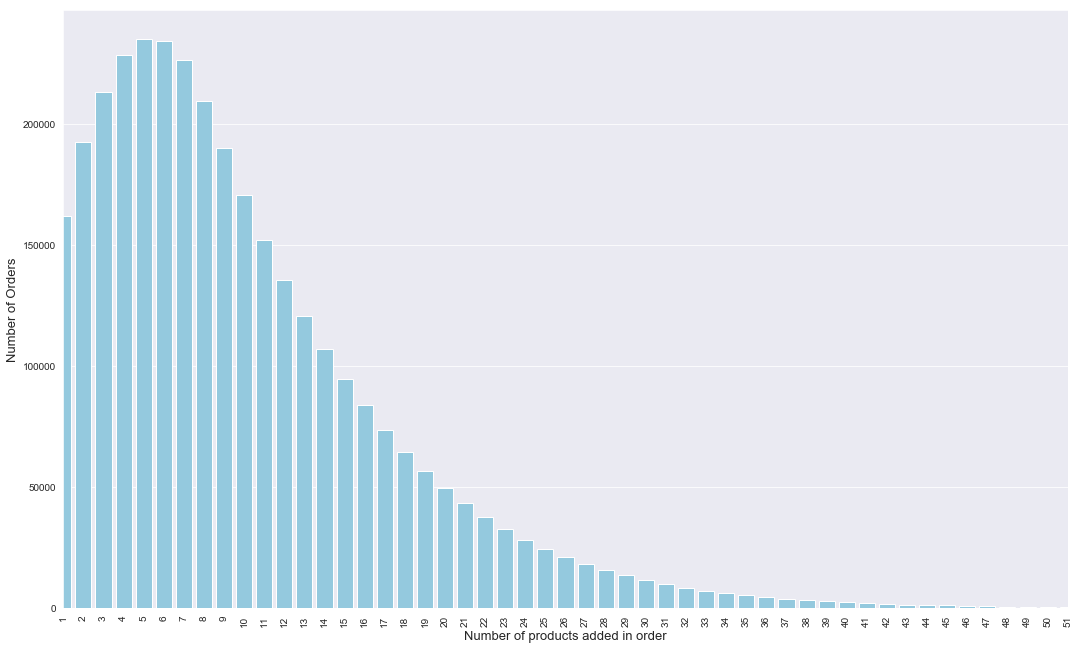

In [52]:
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(18, 11))
plt.xticks(rotation='vertical')
sns.set_color_codes("muted")
sns.barplot(grouped.index, grouped.values, color="skyblue")
plt.ylabel('Number of Orders', fontsize=13)
plt.xlabel('Number of products added in order', fontsize=13)
ax.set(xlim=(0, 50))
plt.show()

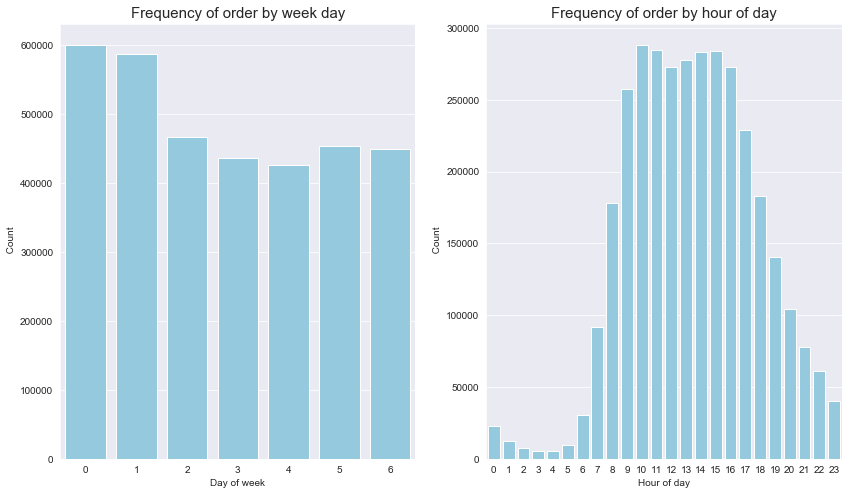

In [51]:
fig, axes = plt.subplots(1,2,figsize=(14, 8))

# Day of order:
ax = axes.flatten()[0]
sns.countplot(x="order_dow", data=orders, color="skyblue", ax = ax)
ax.set(xlabel = "Day of week", ylabel=" Count")
ax.set_title("Frequency of order by week day", fontsize=15)

# Hours of order:
ax = axes.flatten()[1]
sns.countplot(x="order_hour_of_day", data=orders, color="skyblue" , ax = ax)
ax.set(xlabel = "Hour of day", ylabel=" Count")
ax.set_title("Frequency of order by hour of day", fontsize=15)

plt.show()

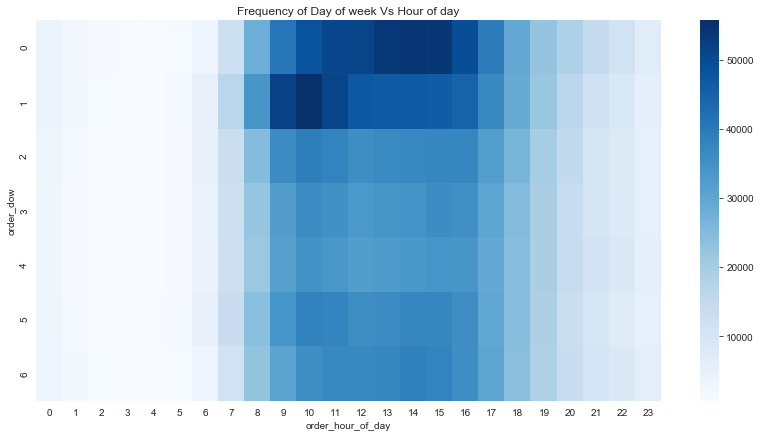

In [65]:
grouped_df = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')
plt.figure(figsize=(14,7))
sns.heatmap(grouped_df,cmap="Blues")
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

## Understanding the Products:

#### Most diverse Aisles in each Department - count the number of products in each aisles

<img src="./treemap_products.png">

In [54]:
items  = pd.merge(left =pd.merge(left=products, right=departments, how='left'), right=aisles, how='left')

In [55]:
grouped = items.groupby(["department", "aisle"])["product_id"].aggregate({'Total_products': 'count'}).reset_index()
grouped.sort_values(by='Total_products', ascending=False, inplace=True)

In [ ]:
## Save to csv file
# depart_aisle_order = "depart_aisle_count.csv"
# grouped.to_csv(depart_aisle_order)

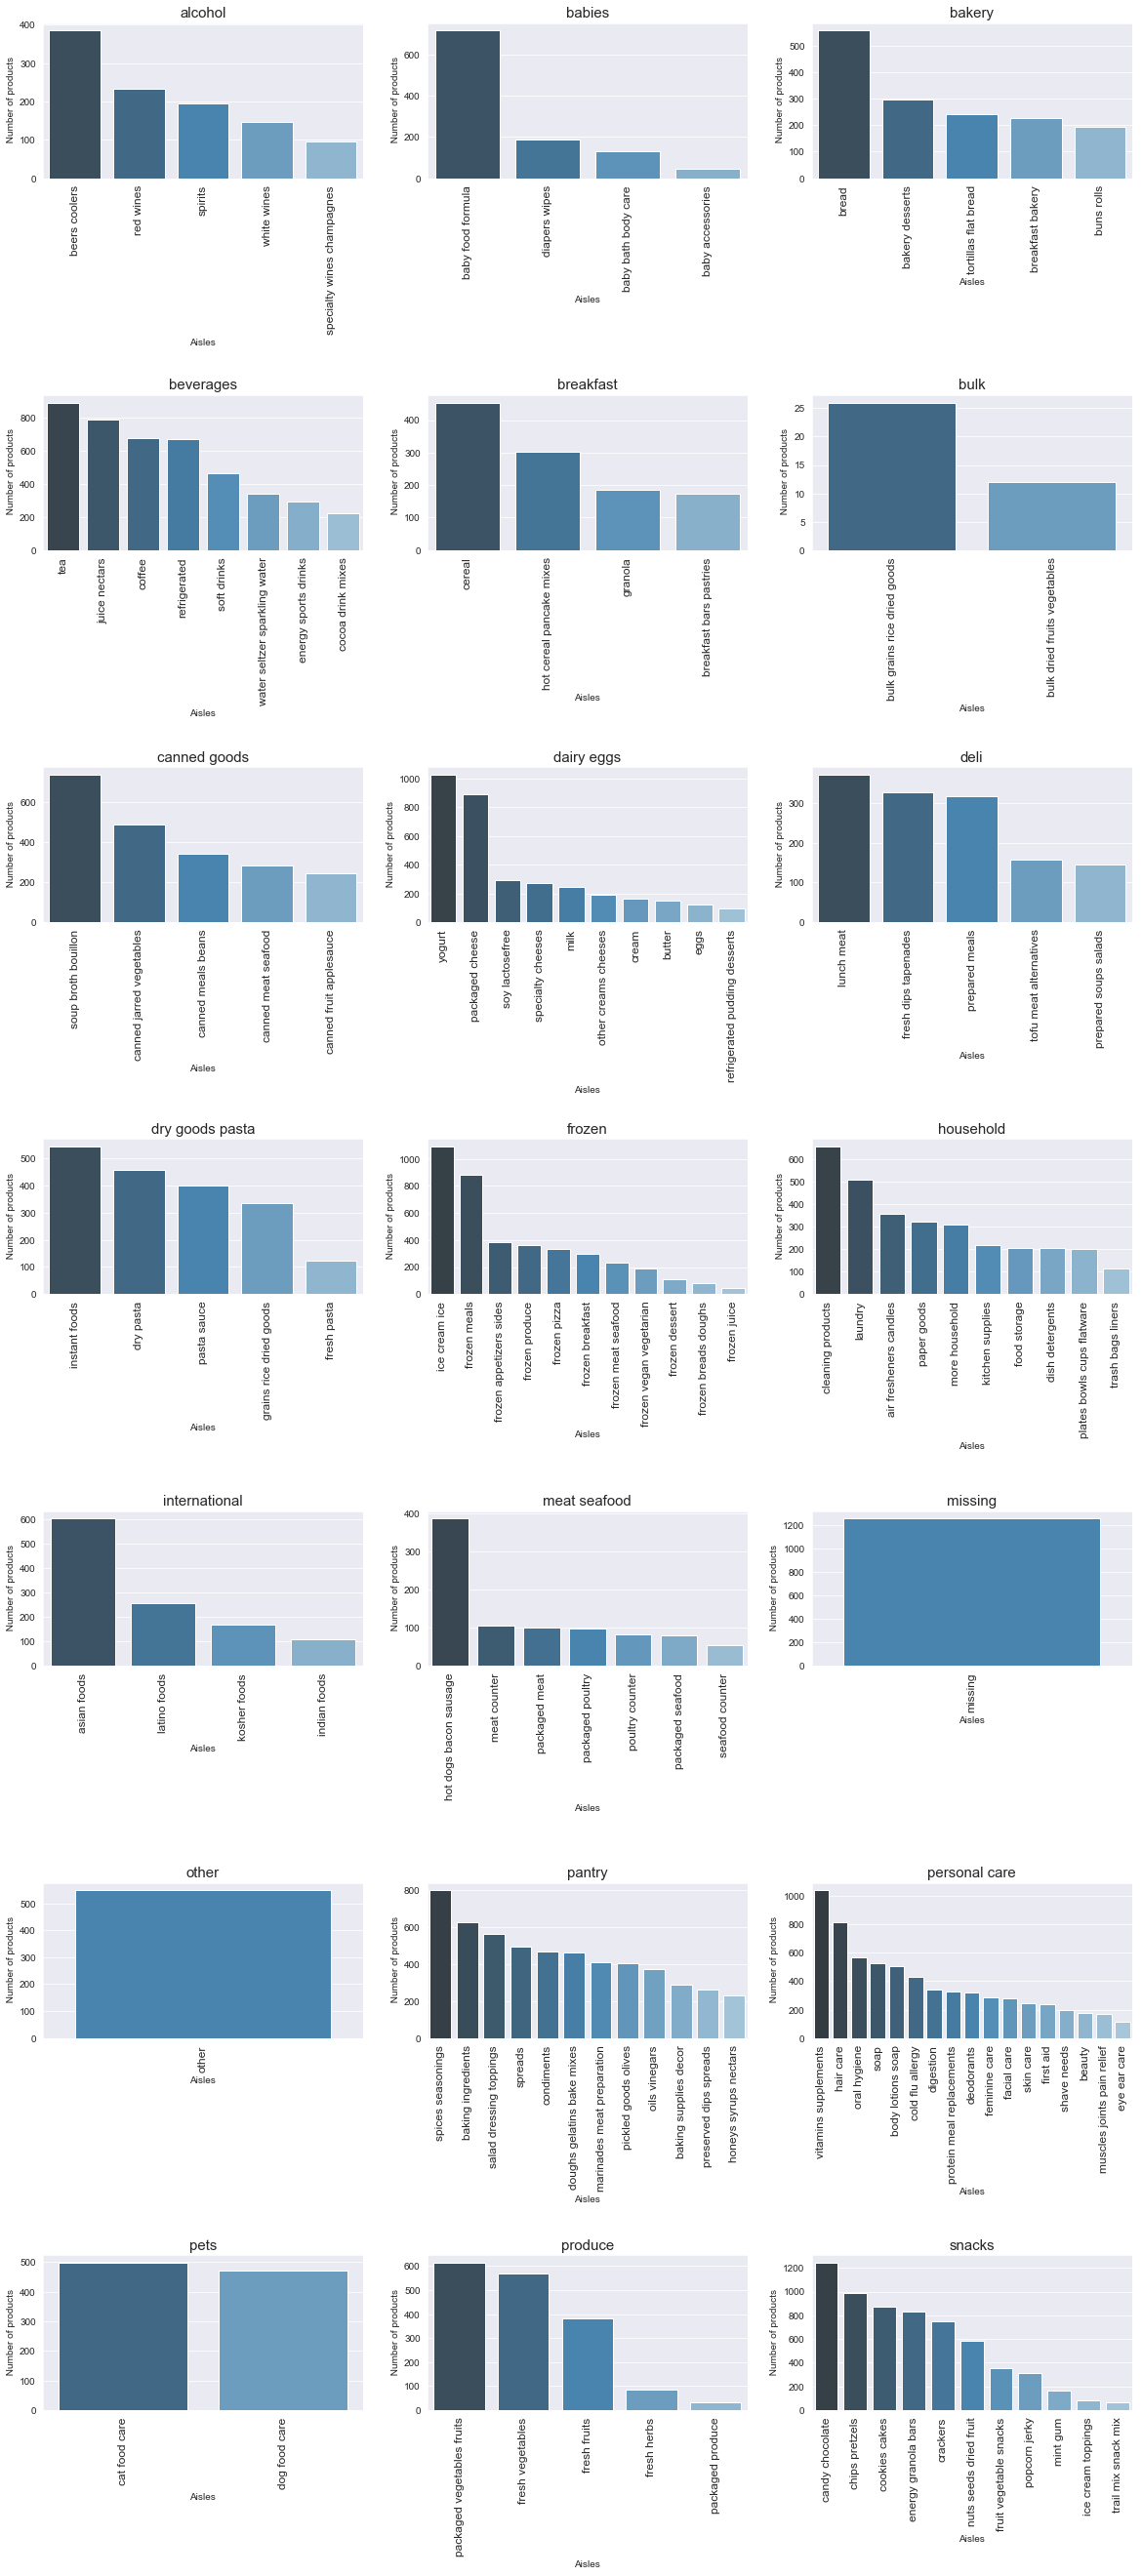

In [56]:
fig, axes = plt.subplots(7,3, figsize=(20,45), gridspec_kw =  dict(hspace=1.4))
for (aisle, group), ax in zip(grouped.groupby(["department"]), axes.flatten()):
    g = sns.barplot(group.aisle, group.Total_products , ax=ax, palette="Blues_d")
    ax.set(xlabel = "Aisles", ylabel=" Number of products")
    g.set_xticklabels(labels = group.aisle,rotation=90, fontsize=12)
    ax.set_title(aisle, fontsize=15)

#### Most popular Aisles in each Department - count the number of orders in each aisles

<img src="./treemap_order.png">

In [57]:
order_merged = orders[['user_id', 'order_id', 'order_hour_of_day','order_dow']].merge(order_products_all[['order_id', 'product_id', 'reordered', 'add_to_cart_order' ]],
                                          how='left', left_on='order_id', right_on='order_id')

order_merged = order_merged.merge(items, how='inner', left_on='product_id',
                                         right_on='product_id')

In [60]:
group_depart = order_merged.groupby("department")["order_id"].aggregate({'Total_orders': 'count'}).reset_index()
group_depart['Ratio'] = group_depart["Total_orders"].apply(lambda x: x /group_depart['Total_orders'].sum())
group_depart.sort_values(by='Total_orders', ascending=False, inplace=True)
group_depart

,department,Total_orders,Ratio
19,produce,9786742,0.292
7,dairy eggs,5576828,0.167
20,snacks,2976610,0.089
3,beverages,2775857,0.083
10,frozen,2311749,0.069
16,pantry,1936508,0.058
2,bakery,1213187,0.036
6,canned goods,1102969,0.033
8,deli,1084379,0.032
9,dry goods pasta,895623,0.027


In [59]:
grouped_dep_aisl = order_merged.groupby(["department", "aisle"])["order_id"].aggregate({'Total_orders': 'count'}).reset_index()
grouped.sort_values(by='Total_orders', ascending=False, inplace=True)

In [114]:
## Export to csv file
# depart_aisle_order = "depart_aisle_order.csv"
# grouped.to_csv(depart_aisle_order)

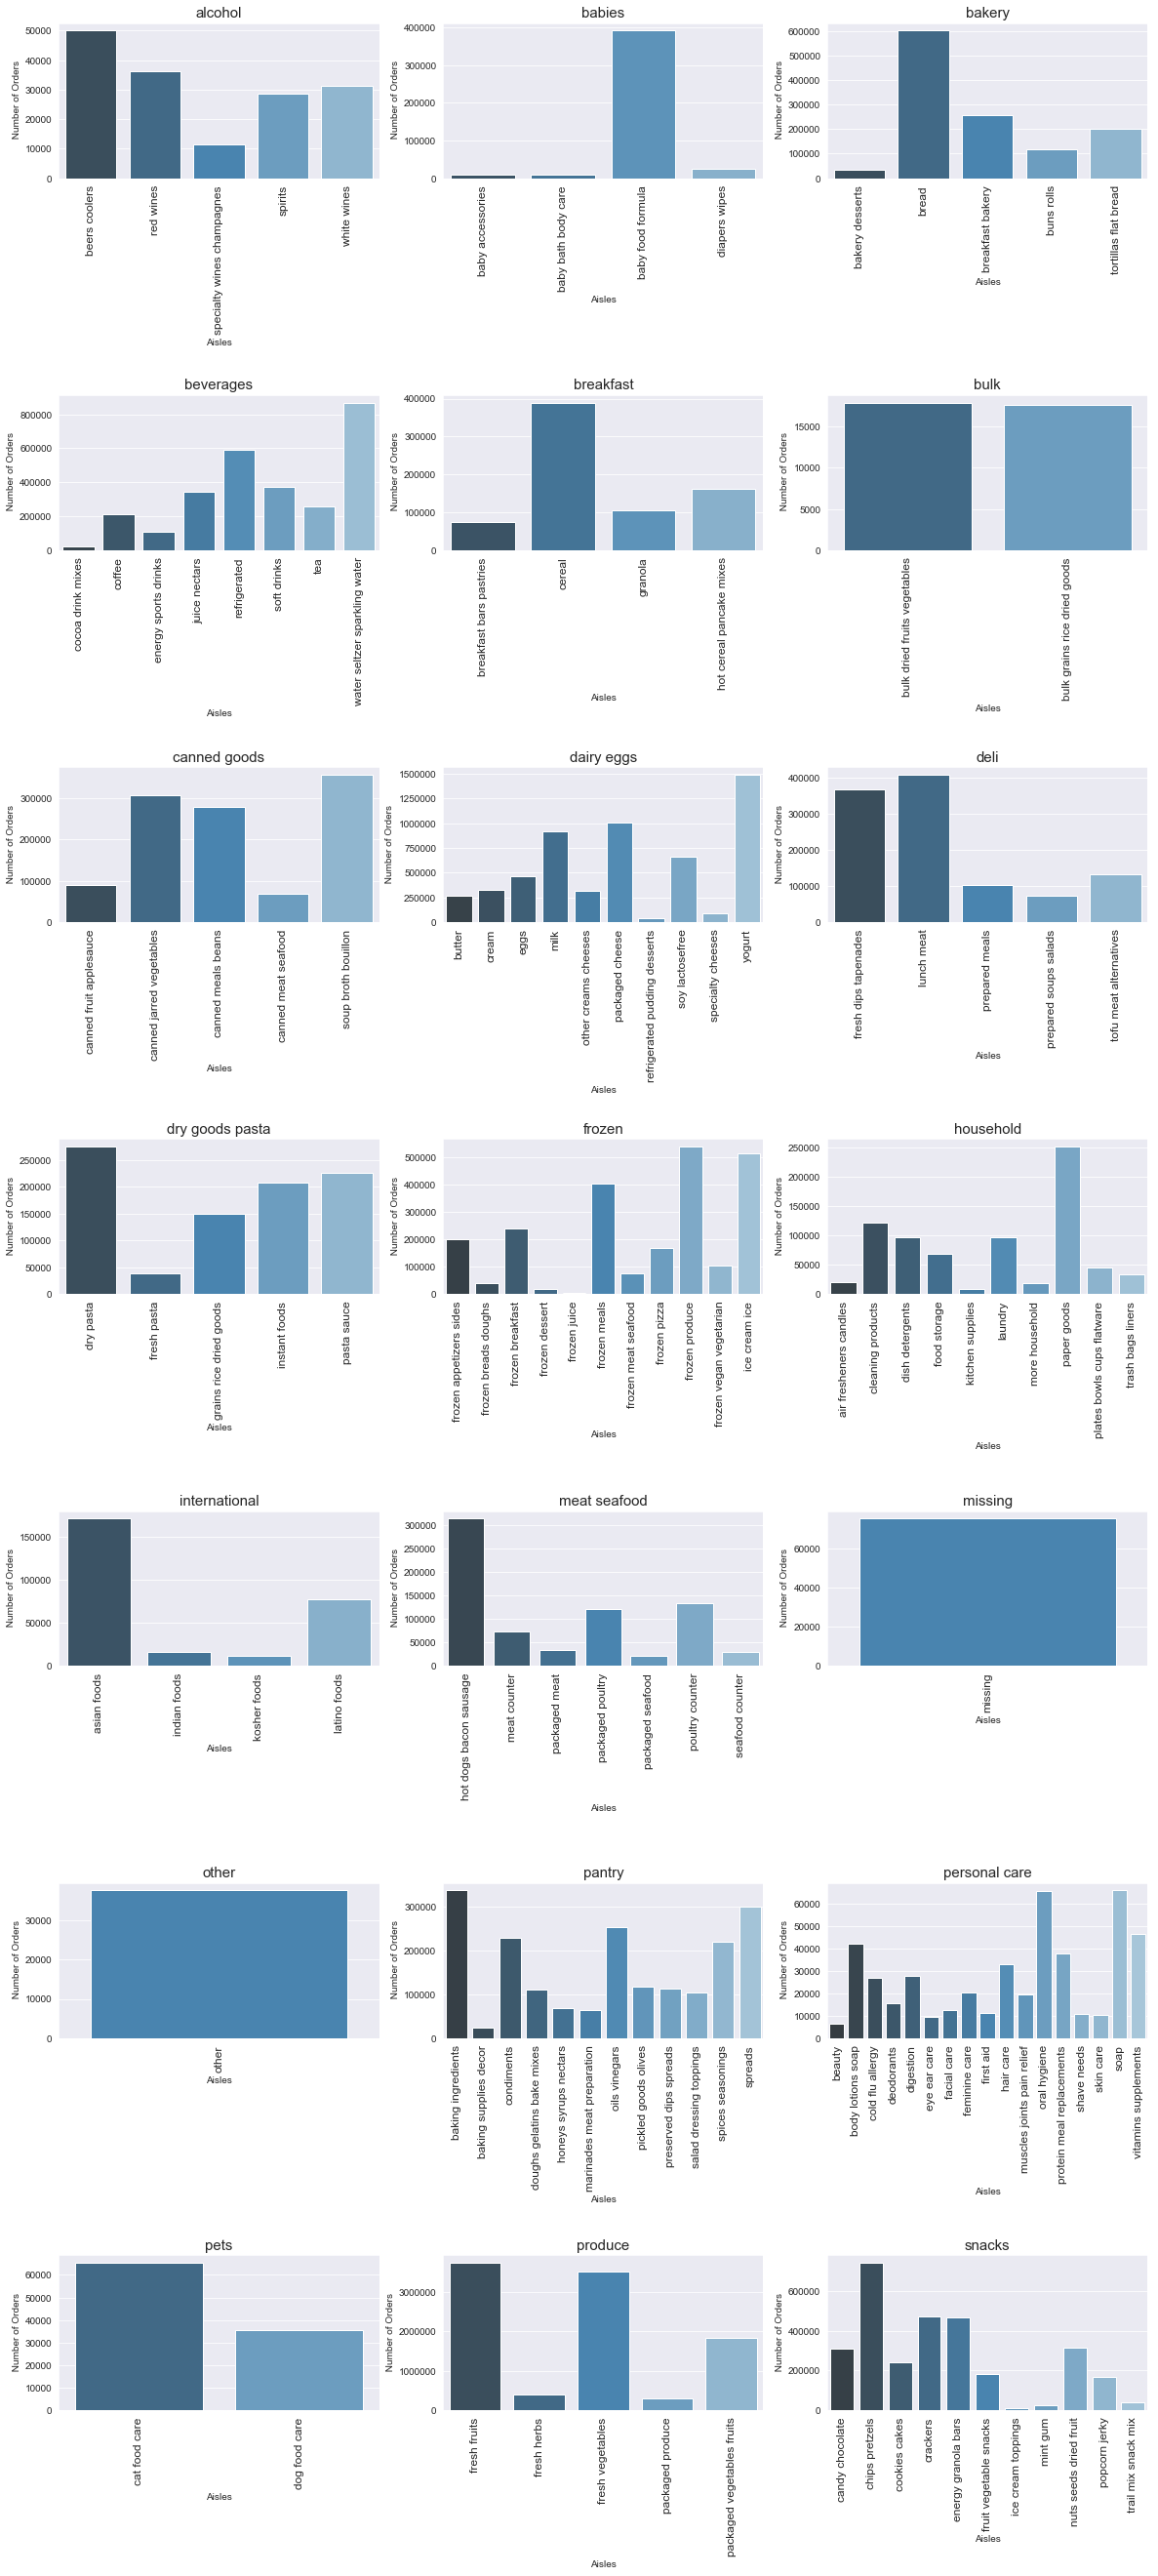

In [61]:
fig, axes = plt.subplots(7,3, figsize=(20,45), gridspec_kw =  dict(hspace=1.4))
for (aisle, group), ax in zip(grouped_dep_aisl.groupby(["department"]), axes.flatten()):
    g = sns.barplot(group.aisle, group.Total_orders , ax=ax, palette="Blues_d")
    ax.set(xlabel = "Aisles", ylabel=" Number of Orders")
    g.set_xticklabels(labels = group.aisle,rotation=90, fontsize=12)
    ax.set_title(aisle, fontsize=15)

## Analysis on Reorder

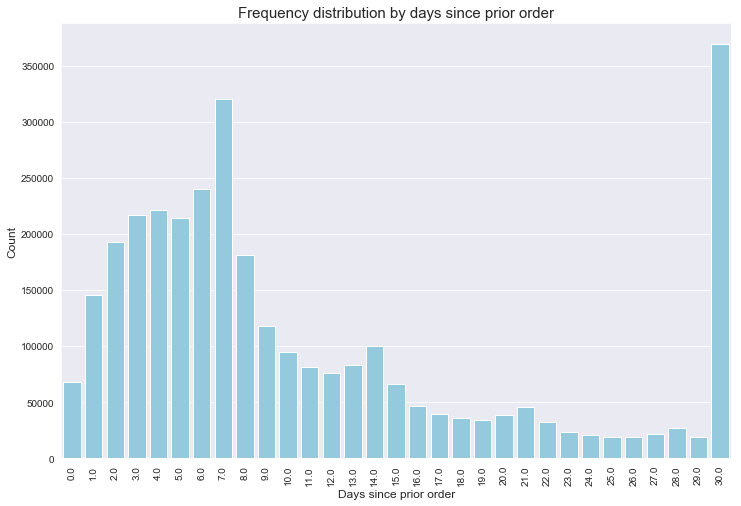

In [49]:
# Period of reorder
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders, color="skyblue")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

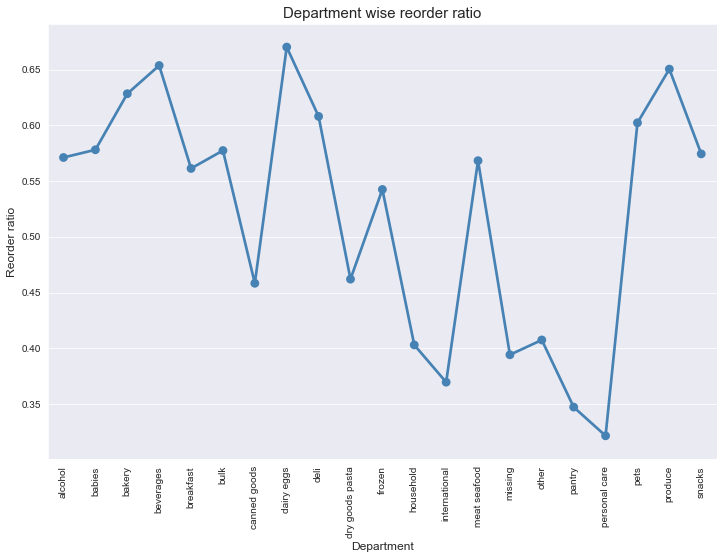

In [62]:
## Department wise reorder ratio:
grouped_df = order_merged.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['department'].values, grouped_df['reordered'].values, alpha=0.8, color='steelblue')
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

### Add to Cart - Reorder ratio:
Let us now explore the relationship between how order of adding the product to the cart affects the reorder ratio.

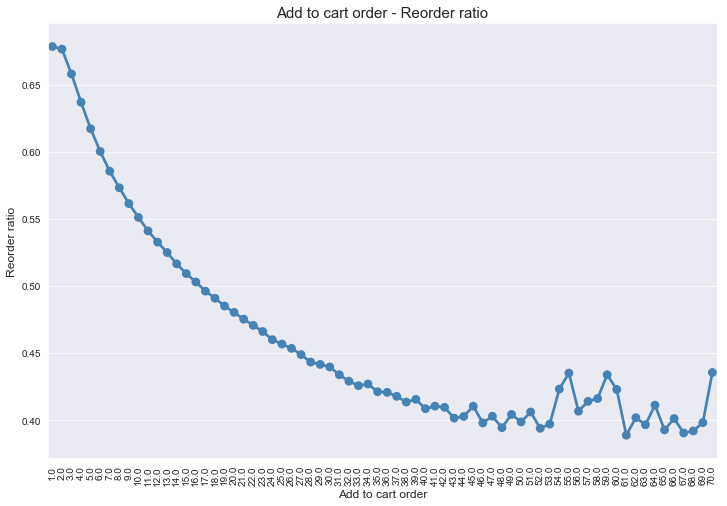

In [63]:
order_merged["add_to_cart_order_mod"] = order_merged["add_to_cart_order"].copy()
order_merged["add_to_cart_order_mod"].ix[order_merged["add_to_cart_order_mod"]>70] = 70
grouped_df = order_merged.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['add_to_cart_order_mod'].values, grouped_df['reordered'].values, alpha=0.8, color='steelblue')
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Add to cart order - Reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

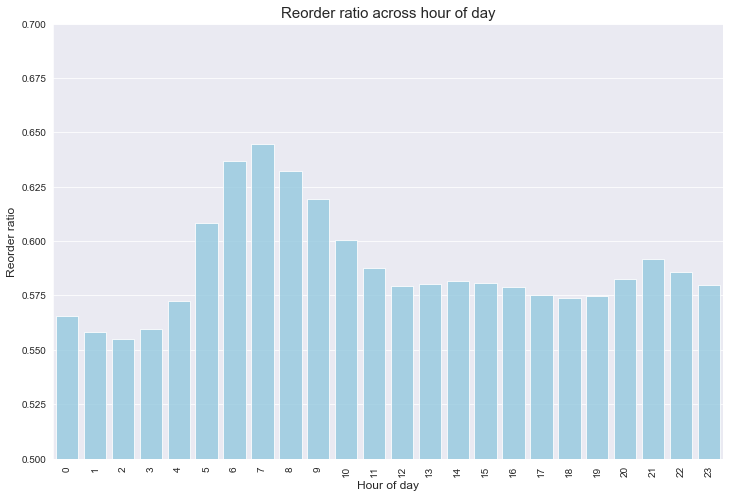

In [64]:
#order_merged["order_hour_of_day"] = int(order_merged["order_hour_of_day"].vale())
grouped_df = order_merged.groupby(["order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
plt.figure(figsize=(12,8))
sns.barplot(grouped_df['order_hour_of_day'].values, grouped_df['reordered'].values, alpha=0.8, color='skyblue')
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.title("Reorder ratio across hour of day", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

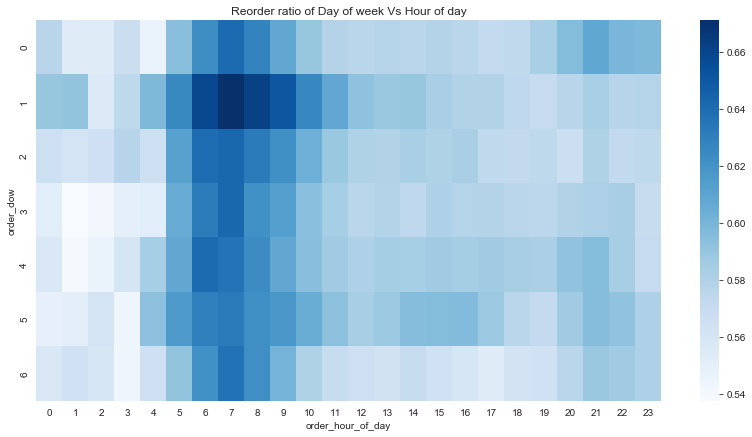

In [67]:
grouped_df = order_merged.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'reordered')

plt.figure(figsize=(14,7))
sns.heatmap(grouped_df,cmap="Blues")
plt.title("Reorder ratio of Day of week Vs Hour of day")
plt.show()

### Some data processing to generate json file, ignore this:

In [3]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
da_count = pd.read_csv('./depart_aisle_count.csv')
da_order = pd.read_csv('./depart_aisle_order.csv')

In [7]:
da_count

,department,aisle,Total_products
0,missing,missing,1258
1,snacks,candy chocolate,1246
2,frozen,ice cream ice,1091
3,personal care,vitamins supplements,1038
4,dairy eggs,yogurt,1026
...,...,...,...
129,frozen,frozen juice,47
130,babies,baby accessories,44
131,produce,packaged produce,32
132,bulk,bulk grains rice dried goods,26


In [6]:
del da_count['Unnamed: 0']
del da_order['Unnamed: 0']

In [8]:
da_count.columns =['subregion', 'key','value'] 
da_count['region'] = ["Instacart Online Grocery Shopping"] * len(da_count)
da_order.columns =['subregion', 'key','value'] 
da_order['region'] = ["Instacart Online Grocery Shopping"] * len(da_order)

In [2]:
da_summary = da_count[['department', 'aisle', 'Total_products']].merge(da_order[['Total_orders','aisle']],
                                          how='inner', left_on='aisle', right_on='aisle')

In [3]:
da_summary.columns =['subregion', 'key','value','value_1'] 
da_summary['region'] = ["Instacart Online Grocery Shopping"] * len(da_summary)

In [4]:
da_summary

,subregion,key,value,value_1,region
0,missing,missing,1258,75378,Instacart Online Grocery Shopping
1,snacks,candy chocolate,1246,309082,Instacart Online Grocery Shopping
2,frozen,ice cream ice,1091,515415,Instacart Online Grocery Shopping
3,personal care,vitamins supplements,1038,46540,Instacart Online Grocery Shopping
4,dairy eggs,yogurt,1026,1493853,Instacart Online Grocery Shopping
...,...,...,...,...,...
129,frozen,frozen juice,47,5075,Instacart Online Grocery Shopping
130,babies,baby accessories,44,8393,Instacart Online Grocery Shopping
131,produce,packaged produce,32,286186,Instacart Online Grocery Shopping
132,bulk,bulk grains rice dried goods,26,17668,Instacart Online Grocery Shopping


In [6]:
filename = "summary.csv"
da_summary.to_csv(filename)

In [15]:
import json

In [14]:
my_details = da_summary.to_json(orient='records')

In [18]:
with open('Instacart.json', 'w') as json_file:
    json.dump(my_details, json_file)